In [2]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import torch
import os
from model_training.architectures.simple_convolution_network import SimpleConvolutionArchitecture
from model_training.cnn_classifier import CNNClassifier

MODEL_PATH = '../models/extras_simple_cnn_tsrc_spectrograms_cleaned_augmented_sharpened'
EPOCHS = 6

## Changes in individual layers

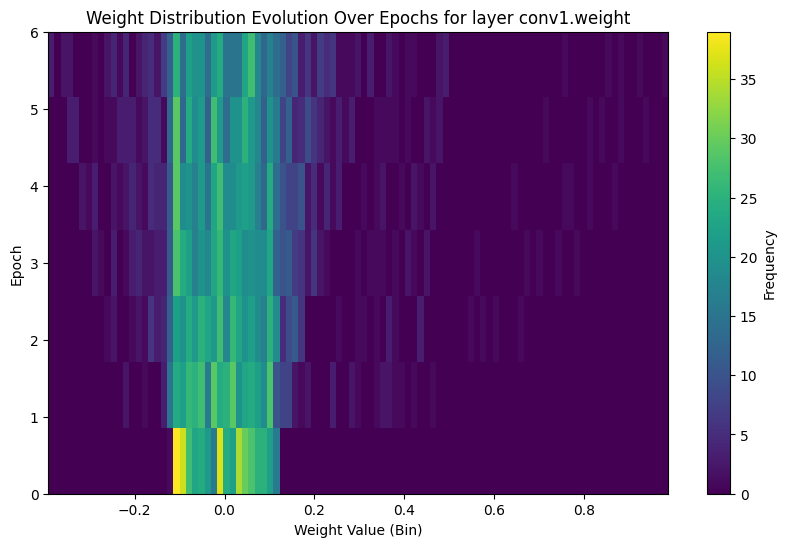

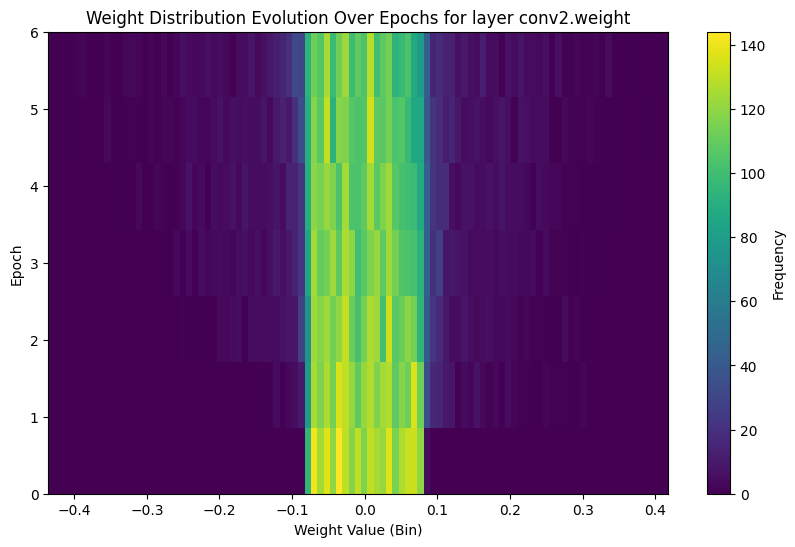

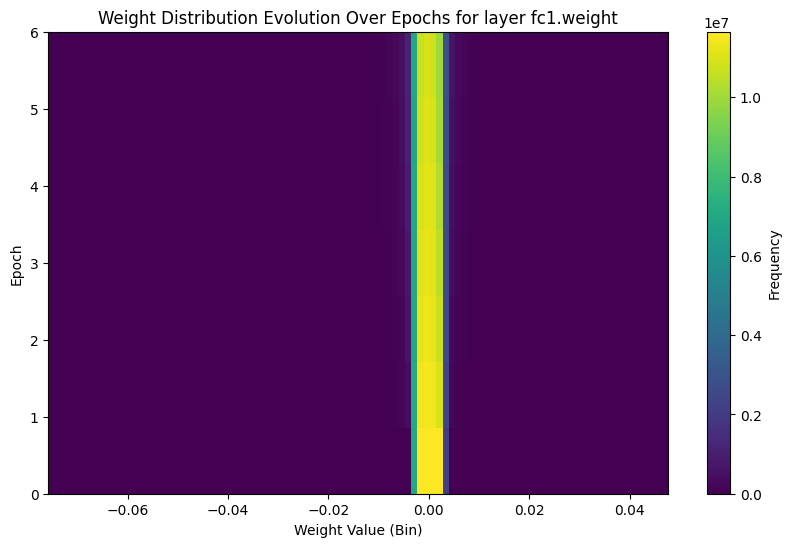

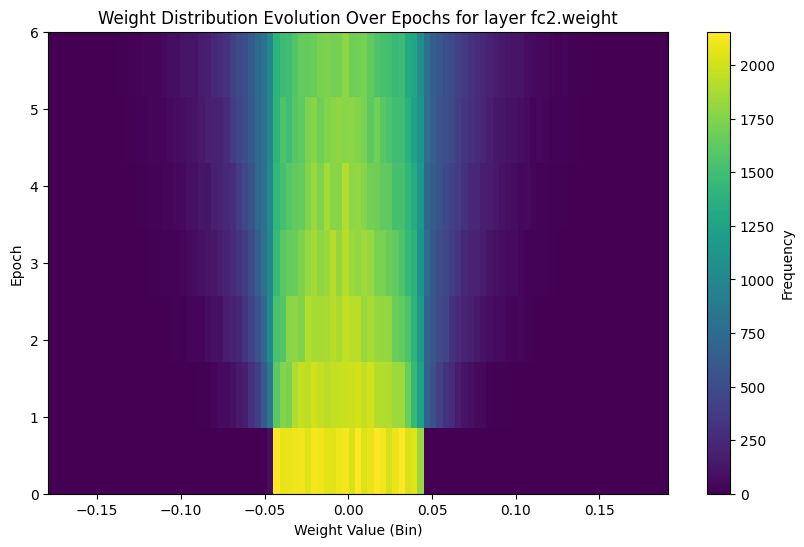

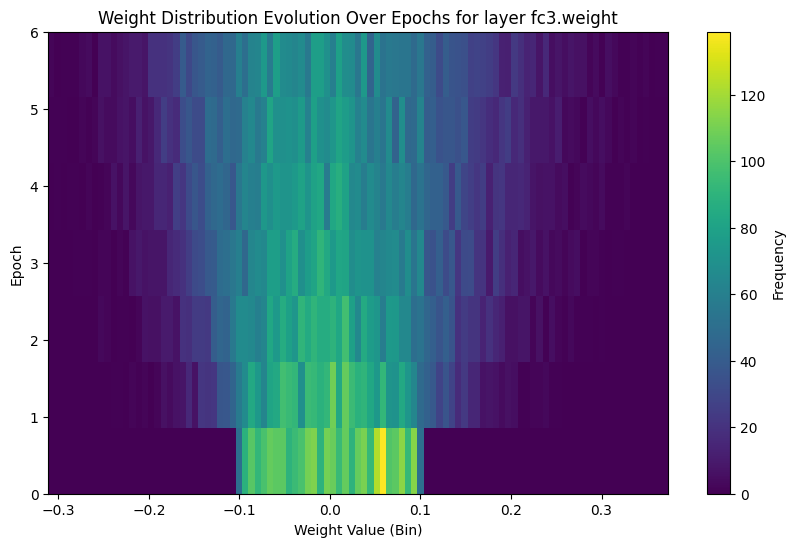

In [ ]:
def plot_weight_distribution(layer: str):
    weights = []

    for i in range(0, EPOCHS + 1):
        weights_file = f'{MODEL_PATH}/model_{i}.pth'
        state_dict = torch.load(weights_file, weights_only=True)
    
        layer_weights = state_dict[layer].flatten().cpu().numpy()
        weights.append(layer_weights)

    w_min = min([w.min() for w in weights])
    w_max = max([w.max() for w in weights])
    bins = np.linspace(w_min, w_max, 100)
    heatmap_data = []

    for w in weights:
        counts, _ = np.histogram(w, bins=bins)
        heatmap_data.append(counts)

    heatmap_data = np.array(heatmap_data)

    plt.figure(figsize=(10, 6))
    plt.imshow(heatmap_data, aspect='auto', cmap='viridis', origin='lower',
           extent=[bins[0], bins[-1], 0, EPOCHS])
    plt.colorbar(label='Frequency')
    plt.xlabel('Weight Value (Bin)')
    plt.ylabel('Epoch')
    plt.title(f'Weight Distribution Evolution Over Epochs for layer {layer}')
    plt.show()

for layer in ['conv1.weight', 'conv2.weight', 'fc1.weight', 'fc2.weight', 'fc3.weight']:
    plot_weight_distribution(layer)


## Layer robustness

In [4]:
ARCHITRECTURE = SimpleConvolutionArchitecture()
CLASS_LABELS = os.listdir('../data/tsrc_spectrograms_cleaned/train')

In [5]:
DATASET_NAME = "tsrc_spectrograms_cleaned_augmented_sharpened"
DATASET_PATH = f"../data/{DATASET_NAME}"
FOLDER_PATH = f"../models/robustness_2_single_cnn_{DATASET_NAME}"
model = CNNClassifier(FOLDER_PATH, architecture=ARCHITRECTURE, epoch_checkpoints=True)

In [5]:
_, roustness_results = model.fit(
    f"{DATASET_PATH}/train", 
    f"{DATASET_PATH}/validation",
    batch_size=32,
    n_epochs=6,
    measure_layer_robusness=True,
)

Running training on GPU...


Evaluating:   0%|          | 0/1001 [00:00<?, ?it/s]P:\MINI8\I2ML\intro-to-ml\model_training\trainer.py:156: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  outputs = F.softmax(self._model(images))
Evaluating: 100%|██████████| 1001/1001 [00:24<00:00, 40.95it/s]


Epoch 0 Done after 700.5435388088226 seconds


Evaluating: 100%|██████████| 1001/1001 [00:23<00:00, 42.51it/s]


Epoch 1 Done after 690.0287318229675 seconds


Evaluating: 100%|██████████| 1001/1001 [00:23<00:00, 42.23it/s]


Epoch 2 Done after 685.741005897522 seconds


Evaluating: 100%|██████████| 1001/1001 [00:22<00:00, 44.18it/s]


Epoch 3 Done after 674.4239645004272 seconds


Evaluating: 100%|██████████| 1001/1001 [00:24<00:00, 40.61it/s]


Epoch 4 Done after 685.0627739429474 seconds


Evaluating: 100%|██████████| 1001/1001 [00:24<00:00, 40.09it/s]


Epoch 5 Done after 696.8949618339539 seconds
Finished Training


In [6]:
df = pd.DataFrame(roustness_results)
df.to_csv(f"{FOLDER_PATH}/robustness_results.csv", index=False)

In [25]:
df = pd.read_csv(f"{FOLDER_PATH}/robustness_results.csv")
df.head()

,epoch,layer,base_accuracy,init_accuracy,random_accuracy
0,0,conv1.weight,0.693687,0.348077,0.213163
1,0,conv1.bias,0.693687,0.687190,0.533221
2,0,conv2.weight,0.693687,0.607597,0.422641
3,0,conv2.bias,0.693687,0.693000,0.668916
4,0,fc1.weight,0.693687,0.049168,0.027645


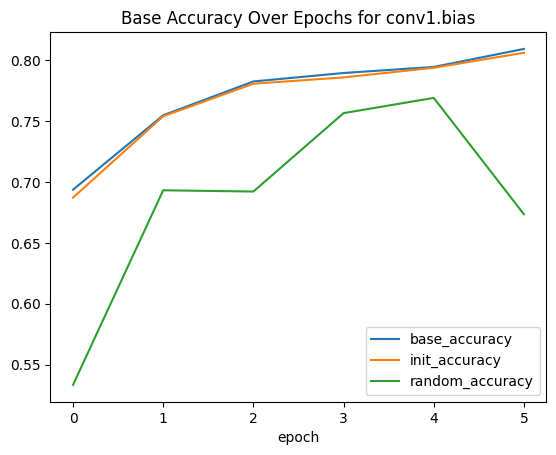

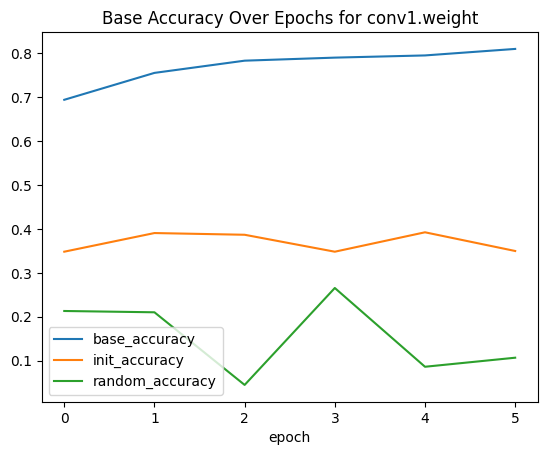

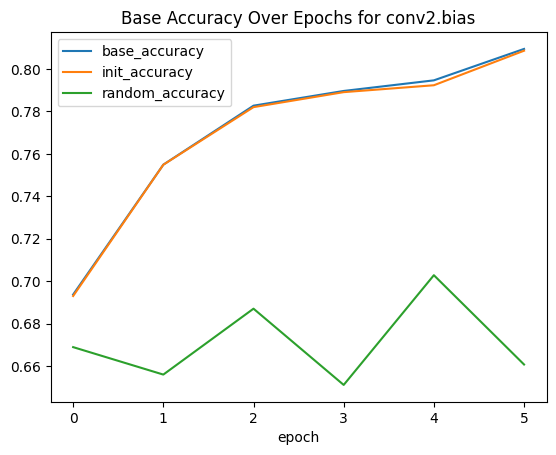

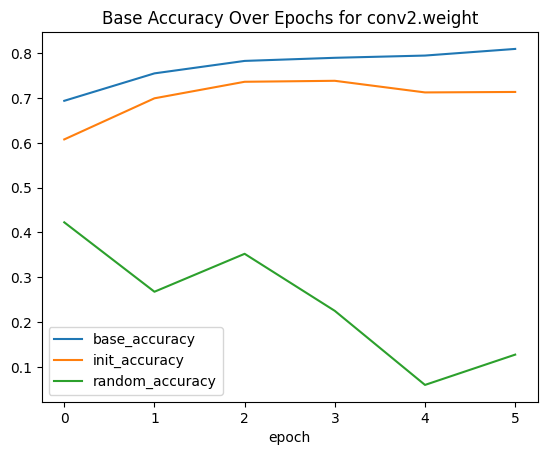

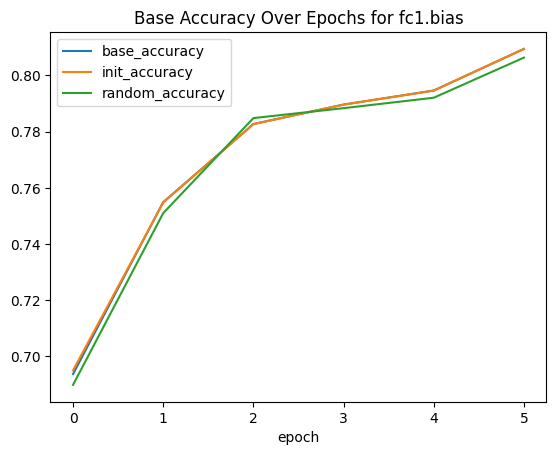

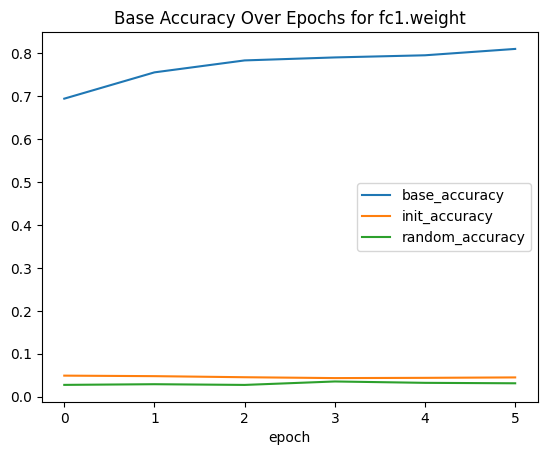

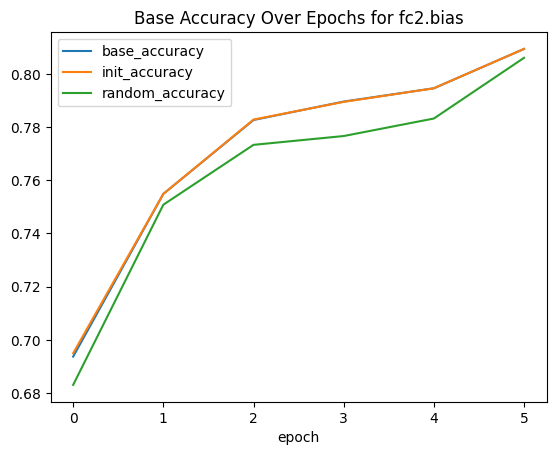

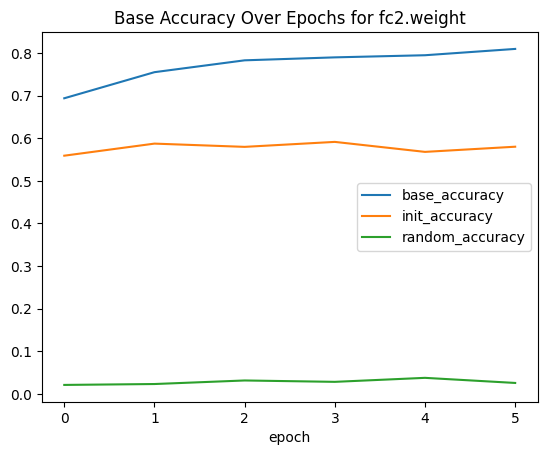

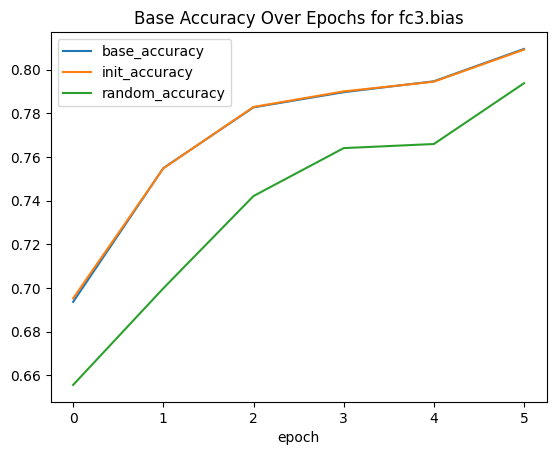

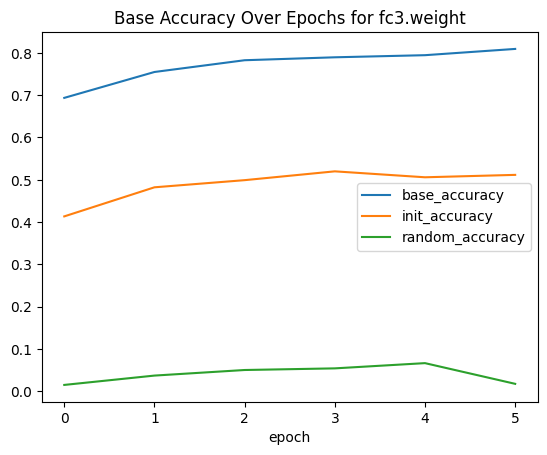

In [26]:
grouped = df.groupby('layer')
for name, group in grouped:
	group.plot(x='epoch', y=['base_accuracy', 'init_accuracy', 'random_accuracy'], title=f'Base Accuracy Over Epochs for {name}', legend=True)